# Time Series Visualizer
https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer

1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from datetime import datetime

register_matplotlib_converters()

## 1 Import data (Make sure to parse dates. Consider setting index column to 'date'.)
 
[pandas.read_csv — pandas 1.4.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)  
[Set Columns as Index in Pandas Dataframe | Delft Stack](https://www.delftstack.com/howto/python-pandas/set-column-as-index-pandas/)  

In [11]:
mydateparse = lambda x: datetime.strptime(x,"%Y-%m-%d")
df = pd.read_csv('fcc-forum-pageviews.csv', delimiter=',', parse_dates=['date'],
                 date_parser=mydateparse, index_col=0)

In [12]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


## 2 Clean Data
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [13]:
df.shape

(1304, 1)

In [14]:
mask = (df['value'] > df['value'].quantile(0.025)) & \
       (df['value'] < df['value'].quantile(0.975))

In [15]:
df_clean = df[mask]

In [16]:
df_clean.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [18]:
df_clean.shape

(1238, 1)

In [20]:
df_clean.info

<bound method DataFrame.info of              value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]>

## 3 Create a draw_line_plot function 
that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

[Add Axis Labels to Seaborn Plot | Delft Stack](https://www.delftstack.com/howto/seaborn/set-axis-labels-seaborn-python/)

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

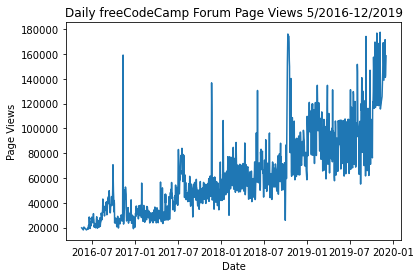

In [33]:
# Seaborn X-axis as index
fig = sns.lineplot(data=df_clean.reset_index(), x='date', y='value', palette=['red'])
fig.set_xlabel("Date")
fig.set_ylabel("Page Views")
fig.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

## 4 Create a draw_bar_plot 

function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [223]:
df_bar = df_clean.copy()
df_bar.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [224]:
df_bar.reset_index(inplace=True)

In [225]:
df_bar.head()

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325


In [226]:
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]
df_bar['day'] = [d.day for d in df_bar.date]

In [227]:
df_bar.head()

,date,value,year,month,day
0,2016-05-19,19736,2016,May,19
1,2016-05-26,18060,2016,May,26
2,2016-05-27,19997,2016,May,27
3,2016-05-28,19044,2016,May,28
4,2016-05-29,20325,2016,May,29


In [228]:
df_test = df_bar.drop(columns=['date', 'day'])

In [229]:
df_test.head(5)

,value,year,month
0,19736,2016,May
1,18060,2016,May
2,19997,2016,May
3,19044,2016,May
4,20325,2016,May


[Pandas GroupBy: Your Guide to Grouping Data in Python – Real Python](https://realpython.com/pandas-groupby/)

In [230]:
df_new = df_test.groupby(['year', 'month'])['value'].mean().sort_values(ascending=True).rename_axis(['Years', 'Months']).reset_index(name='Average Page Views')

In [231]:
df_new.head()

,Years,Months,Average Page Views
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,October,27398.322581
4,2016,December,27832.419355


In [232]:
hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

(array([0, 1, 2, 3]),
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019')])

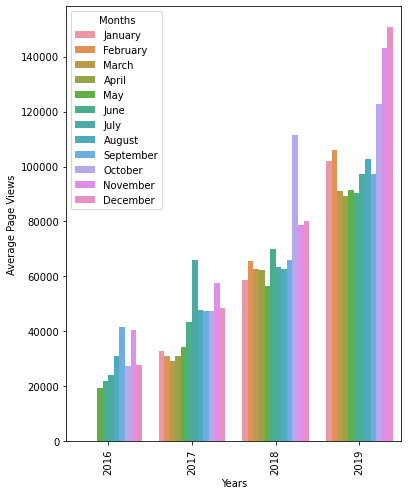

In [238]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.barplot(x='Years', y='Average Page Views', hue='Months', hue_order=hue_order, data=df_new)
ax.legend(loc='upper left', title='Months')
plt.xticks(rotation=90)

## 5 Create a draw_box_plot function 
that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.

[Seaborn Box Plot - Tutorial and Examples](https://stackabuse.com/seaborn-box-plot-tutorial-and-examples/)

In [269]:
df_box = df_clean.copy()
df_box.reset_index(inplace=True)

In [271]:
df_box.head()

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325


In [272]:
df_box.tail(3)

,date,value
1235,2019-11-30,141161
1236,2019-12-01,142918
1237,2019-12-03,158549


In [273]:
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [274]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [275]:
data = df_box.copy() # 不用sort 也可

In [276]:
data['num_month'] = data['date'].dt.month
data = data.sort_values('num_month')
data.head(3)

,date,value,year,month,num_month
210,2017-01-06,37353,2017,Jan,1
937,2019-01-06,94108,2019,Jan,1
936,2019-01-05,77897,2019,Jan,1


In [261]:
hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

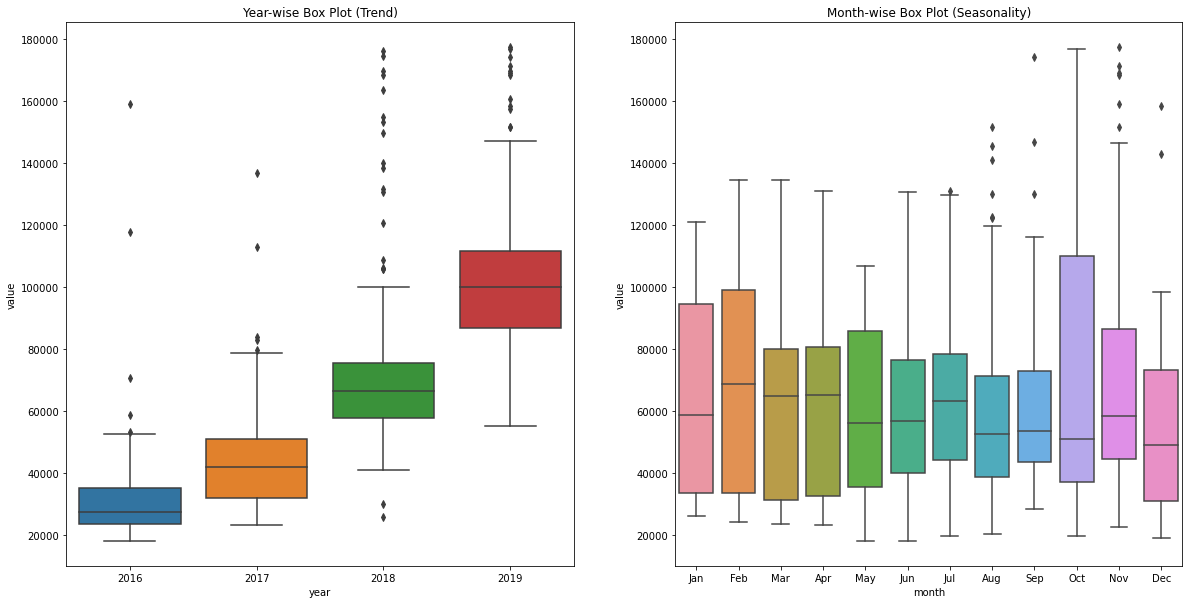

In [278]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0]).set(title='Year-wise Box Plot (Trend)')
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], order=hue_order).set(title='Month-wise Box Plot (Seasonality)')
plt.ylim([0, 200000])
plt.autoscale(tight=False)